# Analysis and Time Series Forecasting of Energy Consumption

# Goals


The focus of this analysis will be on global_active_power: the total active power consumed by the household (kilowatts).

The description of data can be found here:
    
http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import plotly 
import plotly.graph_objects as go
import plotly.express as pe 
import plotly.offline as po
from plotly.offline import init_notebook_mode
import cufflinks as cf

In [2]:
from plotly.offline import iplot

In [3]:
cf.go_offline()

In [4]:
import warnings
warnings.filterwarnings('ignore')

Get Data

In [5]:
#loading the dataset 
data=pd.read_csv("E:\\Python class\\Machine Learning\household_power_consumption.txt",
                 sep=';',na_values=['nan','?'],
                 parse_dates={'datetime' : ['Date', 'Time']},
                 infer_datetime_format=True, 
                 low_memory=False,index_col='datetime')

In [6]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [8]:
data.shape

(2075259, 7)

In [9]:
#Checking any null values inside dataset 
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are total 25979 rows which are Null.
There are multiple ways to handle and fill missing values like mean, median, forward fill, backward fill, scikit learn Imputer methods, etc.
For this problem, we will either use forward fill or backward fill. Reason: The records ahving null values are in between and the power used is recorded at every minute for 3-4 years. ffill() will fill last valid observation in next found Null record

In [10]:
#fill missing values using ffill rowwise and making changes permenent
data.ffill(axis=0,inplace=True)

In [11]:
#verifying data has filled missing values or not 
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.086168,1.053172,0.076,0.308,0.598,1.524,11.122
Global_reactive_power,2075259.0,0.123328,0.112514,0.000,0.048,0.100,0.194,1.390
Voltage,2075259.0,240.841608,3.235574,223.200,239.000,241.020,242.870,254.150
Global_intensity,2075259.0,4.604226,4.426775,0.200,1.400,2.600,6.400,48.400
Sub_metering_1,2075259.0,1.110995,6.115908,0.000,0.000,0.000,0.000,88.000
Sub_metering_2,2075259.0,1.287958,5.786865,0.000,0.000,0.000,1.000,80.000
Sub_metering_3,2075259.0,6.416570,8.419505,0.000,0.000,1.000,17.000,31.000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


ANALYSIS

our main target is to find power consumption for that we have to calculate power consumption using following equation 

(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

In [14]:
#Creating target variable inside dataset 
value1=data['Global_active_power']*1000/60
value2=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data['PowerConsumption']=value1-value2

In [15]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,PowerConsumption
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [16]:
# Converting Date Datatype form object to datetime
data['Date']=data.index.date
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data['time']=data.index.time

In [18]:
# Checking the data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   PowerConsumption       float64       
 8   Date                   datetime64[ns]
 9   time                   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 174.2+ MB


In [19]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,PowerConsumption,Date,time
datetime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,2006-12-16,17:24:00
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,2006-12-16,17:25:00
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,2006-12-16,17:26:00
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,2006-12-16,17:27:00
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,2006-12-16,17:28:00


In [20]:
data['Date'].value_counts()
#For year 2006 if we divide it by 24 we get total days for power consumption is calculated and is 16

2008-12-06    1440
2009-08-09    1440
2009-08-07    1440
2009-08-06    1440
2009-08-05    1440
              ... 
2008-04-05    1440
2008-04-04    1440
2010-11-24    1440
2010-11-26    1263
2006-12-16     396
Name: Date, Length: 1442, dtype: int64

As we have only 16 records for 2006 year, which may deceive our analysis. As we will analyse the data yearly and this 16 records will not help us understand the data flow for the year 2006. We will remove those 16 records of 2006 and move ahead for analysis of remaining four year data.

Reason of unavailabilty of data for 2006 could be, data collection might have started for analysis if from 16th december 2006 or else the previous data might have lost due to some serious problem or due to unavailabilty of proper required data for analysis like missing of some features or so.

In [21]:
data=data[data.index.year >2006]

In [22]:
new_data=data
new_data.shape

(2053263, 10)

In [23]:
#Save processed data to csv file 
new_data.to_csv('powerconsumption_after_2006.csv')

Analysis:

    weekly
    monthly
    yearly
    quarterly
    
Analysis on Basis of 3 subsets 

    power Consumption 
    Sub metering
    Global Reactive, Global Active and Global Intensity

In [24]:
#load new datafile
df=pd.read_csv("powerconsumption_after_2006.csv")
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,PowerConsumption,Date,time
0,2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,43.000000,2007-01-01,00:00:00
1,2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,42.533333,2007-01-01,00:01:00
2,2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:02:00
3,2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:03:00
4,2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,42.566667,2007-01-01,00:04:00


As we have data for each minute for each day, we will group the data day-wise, so we will get dataset for per day (where all each minute data is grouped for same date)¶

In [25]:
#Groupin g data Datewise
df_Date=df.groupby(['Date']).sum()

In [26]:
df_Date.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,PowerConsumption
Date,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,14243.933333
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,11791.900000
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,34779.533333
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,35758.733333


In [27]:
df_Date.shape

(1426, 8)

In [28]:
#Creating dataframe for power Consumption 
df_power_consumption=df_Date[['PowerConsumption']].reset_index()
df_power_consumption.head()

,Date,PowerConsumption
0,2007-01-01,39584.733333
1,2007-01-02,14243.933333
2,2007-01-03,11791.900000
3,2007-01-04,34779.533333
4,2007-01-05,35758.733333


In [29]:
df_power_consumption.shape

(1426, 2)

In [30]:
# Creating sub-dataframe of Global_active_power, Global_reactive_power, and Global_intensity 
df_active_reactive=df_Date[['Global_active_power','Global_reactive_power','Global_intensity']].reset_index()
df_active_reactive.head()

,Date,Global_active_power,Global_reactive_power,Global_intensity
0,2007-01-01,2749.004,148.166,11400.4
1,2007-01-02,1269.236,190.342,5348.2
2,2007-01-03,1014.054,196.728,4340.2
3,2007-01-04,3259.412,202.302,13648.6
4,2007-01-05,2713.364,173.154,11354.6


In [31]:
df_active_reactive.shape

(1426, 4)

Creating sub dataframe for submetering 1 ,metering 2,metering 3


In [32]:
df_submetering=df_Date[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].reset_index()
df_submetering.head()

,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01,0.0,352.0,5880.0
1,2007-01-02,0.0,348.0,6562.0
2,2007-01-03,0.0,344.0,4765.0
3,2007-01-04,1051.0,7597.0,10896.0
4,2007-01-05,1483.0,379.0,7602.0


Analysis of power Consumption yearly

In [33]:
df_power_consumption.head()

,Date,PowerConsumption
0,2007-01-01,39584.733333
1,2007-01-02,14243.933333
2,2007-01-03,11791.900000
3,2007-01-04,34779.533333
4,2007-01-05,35758.733333


In [34]:
df_power_consumption['Date']=pd.to_datetime(df_power_consumption['Date'])

In [35]:
df_power_consumption['year']=df_power_consumption['Date'].dt.year

In [36]:
df_power_consumption['month']=df_power_consumption['Date'].dt.month

In [37]:
df_power_consumption['day']=df_power_consumption['Date'].dt.day

Four types of aggregation (Sum, Max, Min, Mean) each for Weekly, Monthly, Quarterly and Yearly Aanalysis.

In [38]:
pe.bar(df_power_consumption.groupby('year')['PowerConsumption'].mean(),title="Yearly Average power Consumption")

In [39]:
pe.bar(df_power_consumption.groupby('year')['PowerConsumption'].max(),title="Yearly Maximum power Consumption")

In [40]:
pe.bar(df_power_consumption.groupby('year')['PowerConsumption'].min(),title="Yearly Minimum power Consumption")

In [41]:
pe.bar(df_power_consumption.groupby('year')['PowerConsumption'].sum(),title="Yearly Total power Consumption")

Conclusion --->
In the year 2007 overall maximun and total power consumption is been observeed whereas in 2010 minimum power consumption was done

Monthly Analysis of power Consuption 

In [42]:
df_power_consumption.groupby('month')['PowerConsumption'].sum().iplot(kind='bar',
                                                                      xTitle='Month',
                                                                      yTitle='Readings in watt hour',
                                                                      title='Monthly Total power Consumption')

In [43]:
df_power_consumption.groupby('month')['PowerConsumption'].max().iplot(kind='bar',
                                                                      xTitle='Month',
                                                                      yTitle='Readings in watt hour',
                                                                      title='Monthly Maximum power Consumption')

In [44]:
df_power_consumption.groupby('month')['PowerConsumption'].min().iplot(kind='bar',
                                                                      xTitle='Month',
                                                                      yTitle='Readings in watt hour',
                                                                      title='Monthly Minimum power Consumption')

In [45]:
df_power_consumption.groupby('month')['PowerConsumption'].mean().iplot(kind='bar',
                                                                      xTitle='Month',
                                                                      yTitle='Readings in watt hour',
                                                                      title='Monthly Average power Consumption')

Conclusion --->
Average power consumption takes place in January ,February ,March ,October ,November,and December
Maximum power consumption was  in March and November 
Minimum power consumption was in August and September 

Analysing power consumption Quartelry 

In [46]:
df_power_consumption['Quarter']=df_power_consumption['Date'].dt.quarter

<AxesSubplot:xlabel='Quarter'>

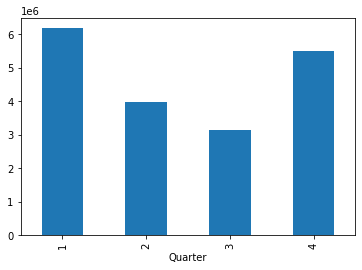

In [47]:
# Quarterly - Total watt-hour for Power Consumption
df_power_consumption.groupby('Quarter')['PowerConsumption'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Quarter'>

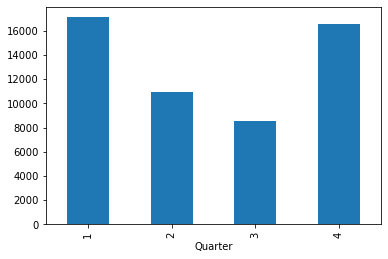

In [48]:
# Quarterly - Average  watt-hour for Power Consumption
df_power_consumption.groupby('Quarter')['PowerConsumption'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Quarter'>

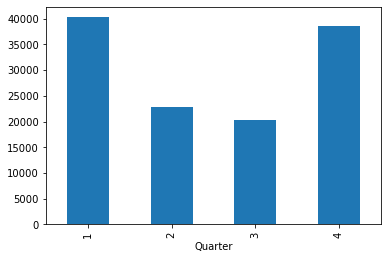

In [49]:
# Quarterly - Maximum watt-hour for Power Consumption
df_power_consumption.groupby('Quarter')['PowerConsumption'].max().plot(kind='bar')

<AxesSubplot:xlabel='Quarter'>

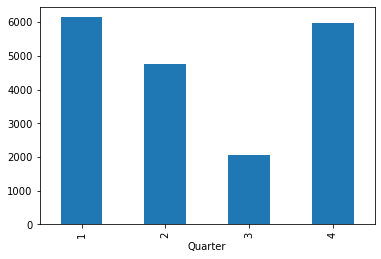

In [50]:
# Quarterly - Minimum  watt-hour for Power Consumption
df_power_consumption.groupby('Quarter')['PowerConsumption'].min().plot(kind='bar')

Conclusion :
    it clearly visible that lowest powet consumption was in 3rd quarter and 
    maximum powr consumption was in 1st and 4th quarter
    in 2nd quarter there was average power consumption

In [51]:
df_power_consumption['Week']=df_power_consumption['Date'].dt.week

In [52]:
#Weekly total power consumption 
df_power_consumption.groupby('Week')['PowerConsumption'].sum().iplot(kind='line',
                                                                     xTitle="WeekNumber",
                                                                    yTitle="Watts per hour",
                                                                    title="Weekly Total power Consumption")

In [53]:
#Conclusion in 3rd week and 5th week total  power consumption was high 

In [54]:
#Weekly Maximum power consumption 
df_power_consumption.groupby('Week')['PowerConsumption'].max().iplot(kind='line',
                                                                    xTitle='WeekNumber',
                                                                    yTitle='Watts per hour',
                                                                    title="Weekly Maximum Power Consumption")

In [55]:
#Conclusion in 10th week maximum power consumption was 40.2806K

In [56]:
#Weekly minimum power consumption 
df_power_consumption.groupby('Week')['PowerConsumption'].min().iplot(kind='line',
                                                                     xTitle='weeknumber',
                                                                    yTitle='watts per hour',
                                                                    title='Weekly Minimum Poer Consumption')

Conclusion -->in 32,33 and 34th week lowest power consumption was done

# Lets start analysis for Submetering Dataframe 

sub_metering_1: It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

sub_metering_2: It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

sub_metering_3: It corresponds to an electric water-heater and an air-conditioner.

In [57]:
df_submetering.head()

,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-01,0.0,352.0,5880.0
1,2007-01-02,0.0,348.0,6562.0
2,2007-01-03,0.0,344.0,4765.0
3,2007-01-04,1051.0,7597.0,10896.0
4,2007-01-05,1483.0,379.0,7602.0


In [58]:
df_submetering['Date']=pd.to_datetime(df_submetering['Date'])

In [59]:
df_submetering['year']=df_submetering['Date'].dt.year

In [60]:
df_submetering['Month']=df_submetering['Date'].dt.month

In [61]:
df_submetering['Day']=df_submetering['Date'].dt.day

In [62]:
df_submetering['Week']=df_submetering['Date'].dt.week

In [63]:
df_submetering['Quarter']=df_submetering['Date'].dt.quarter

In [64]:
df_submetering.head()

,Date,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,Month,Day,Week,Quarter
0,2007-01-01,0.0,352.0,5880.0,2007,1,1,1,1
1,2007-01-02,0.0,348.0,6562.0,2007,1,2,1,1
2,2007-01-03,0.0,344.0,4765.0,2007,1,3,1,1
3,2007-01-04,1051.0,7597.0,10896.0,2007,1,4,1,1
4,2007-01-05,1483.0,379.0,7602.0,2007,1,5,1,1


In [66]:
df_submetering.groupby('year')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().iplot(
    kind='bar',xTitle='Year',yTitle='Readings in watt per hour',
title='Yearly Total Submetering')

In [67]:
#Yearly Average submetering
df_submetering.groupby('year')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].mean().iplot(
    kind='bar',xTitle='Year',yTitle='Readings in watt per hour',
title='Yearly Average  Submetering')

In [68]:
#Yearly maximum submetering
df_submetering.groupby('year')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].max().iplot(
    kind='bar',xTitle='Year',yTitle='Readings in watt per hour',
title='Yearly Maximum Submetering')

In [69]:
#Yearly Minimum Submetering
df_submetering.groupby('year')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].min().iplot(
    kind='bar',xTitle='Year',yTitle='Readings in watt per hour',
title='Yearly Minimum Submetering')

Conclusion -->in every year submetering_3 has the highest value since it referes to water heater and air conditioners

Monthly analysis of Submetering 

In [79]:
df_submetering.groupby('Month')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().iplot(kind='bar',
                                                                                               xTitle='Month',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Monthly Submetering Analysis")

Conclusion-->Sub metering_3 value is highest in 1st month whereas it is lowest in 7th month
similarly submetering_1 has lowest value in 8th month and highest value in 1st month 
submetering_2 has highest value in 3rd month and lowest value in 8th month 

In [83]:

df_submetering.groupby('Month')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].min().iplot(kind='bar',

                                                                                               xTitle='Month',

                                                                                               yTitle='Reading in watts per hour',

                                                                                               title="Monthly Minimum Submetering Analysis")

Quarterly Submetering Analysis

In [88]:
df_submetering.groupby('Quarter')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().iplot(kind='bar',
                                                                                               xTitle='Qaurter',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Qaurterly Submetering Analysis")

In [89]:
df_submetering.groupby('Quarter')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].mean().iplot(kind='bar',
                                                                                               xTitle='Quarter',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Qaurterly Average Submetering Analysis")

In [90]:
df_submetering.groupby('Quarter')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].max().iplot(kind='bar',
                                                                                               xTitle='Quarter',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Qaurterly Maximum Submetering Analysis")

In [92]:
df_submetering.groupby('Quarter')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].min().iplot(kind='bar',
                                                                                               xTitle='Quarter',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Qaurterly Minimum Submetering Analysis")

Conclusion -->
In the 1st quarter overall submetering3 has highest total value

Weekly analysis of Submetering 

In [95]:
df_submetering.groupby('Week')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].sum().iplot(kind='bar',
                                                                                               xTitle='Week',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Weekly Submetering Analysis")

In [123]:
df_submetering.groupby('Week')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].mean().iplot(kind='line',
                                                                                               xTitle='Week',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Weekly Average Submetering Analysis")

In [97]:
df_submetering.groupby('Week')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].max().iplot(kind='bar',
                                                                                               xTitle='Week',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Weekly Maximum Submetering Analysis")

In [98]:
df_submetering.groupby('Week')['Sub_metering_1','Sub_metering_2','Sub_metering_3'].min().iplot(kind='bar',
                                                                                               xTitle='Week',
                                                                                               yTitle='Reading in watts per hour',
                                                                                               title="Weekly Minimum  Submetering Analysis")

Conclusion --->Submetering_3 has high usage in almost evry week 

Lets start analysis of Active Reactive dataframe 

In [99]:
df_active_reactive.head()

,Date,Global_active_power,Global_reactive_power,Global_intensity
0,2007-01-01,2749.004,148.166,11400.4
1,2007-01-02,1269.236,190.342,5348.2
2,2007-01-03,1014.054,196.728,4340.2
3,2007-01-04,3259.412,202.302,13648.6
4,2007-01-05,2713.364,173.154,11354.6


In [103]:
df_active_reactive['Date']=pd.to_datetime(df_active_reactive['Date'])

In [104]:
df_active_reactive['year']=df_active_reactive['Date'].dt.year

In [105]:
df_active_reactive['Month']=df_active_reactive['Date'].dt.month

In [106]:
df_active_reactive['Week']=df_active_reactive['Date'].dt.week

In [108]:
df_active_reactive['Quarter']=df_active_reactive['Date'].dt.quarter

<AxesSubplot:title={'center':'Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

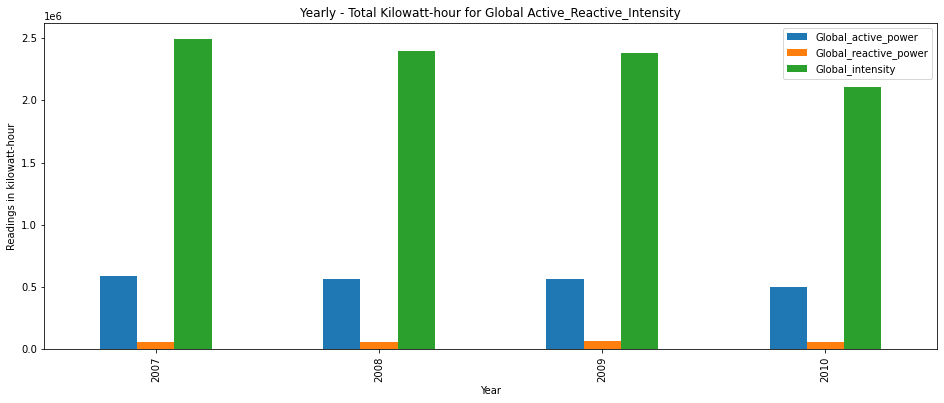

In [110]:
# Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('year')['Global_active_power','Global_reactive_power','Global_intensity'].sum().plot(kind="bar",xlabel='Year',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Yearly - Total Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Yearly  Maximum  Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

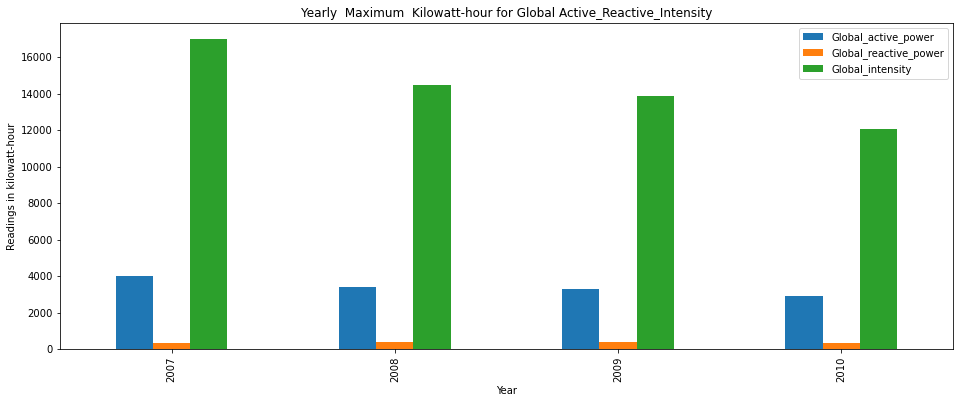

In [120]:
# yearly - Maximum  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('year')['Global_active_power','Global_reactive_power','Global_intensity'].max().plot(kind="bar",xlabel='Year',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Yearly  Maximum  Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Yearly minimum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

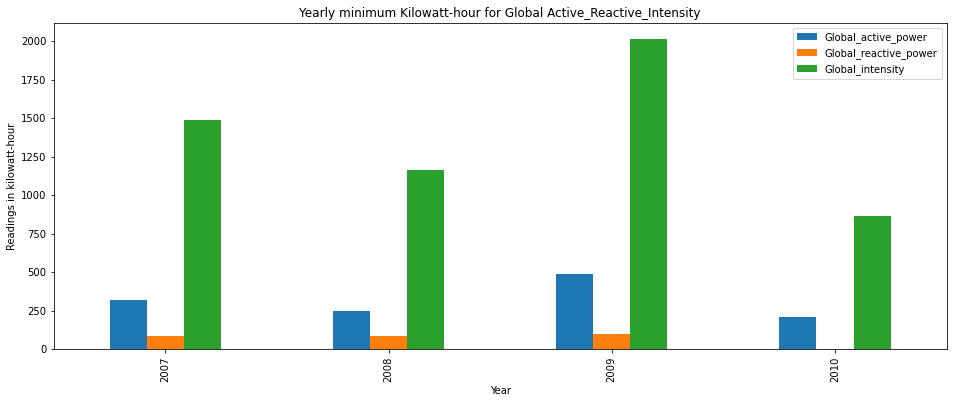

In [121]:
# yearly - Minimum  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('year')['Global_active_power','Global_reactive_power','Global_intensity'].min().plot(kind="bar",
                                                                                                                 xlabel='Year',
                                                                     ylabel='Readings in kilowatt-hour',
                                                                                                                 figsize=(16,6),
                                                                     title="Yearly minimum Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Yearly Average  Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Year', ylabel='Readings in kilowatt-hour'>

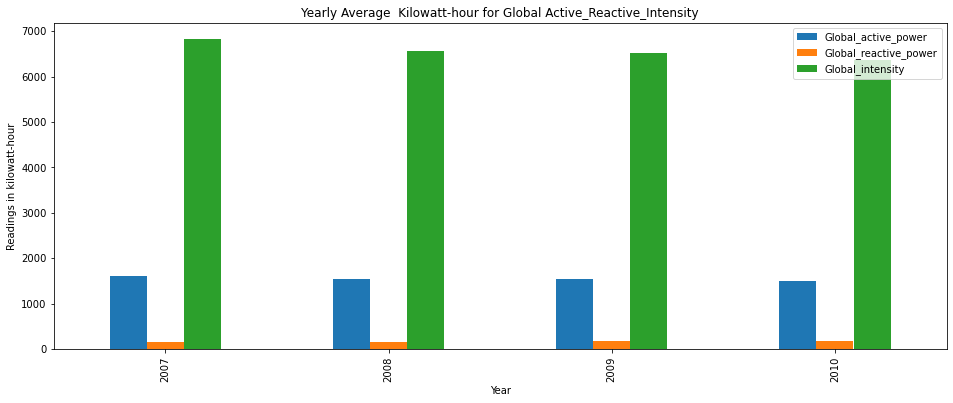

In [122]:
# Yearly Average - Total Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('year')['Global_active_power','Global_reactive_power','Global_intensity'].mean().plot(kind="bar",xlabel='Year',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Yearly Average  Kilowatt-hour for Global Active_Reactive_Intensity")

Obseravtion --->

From the Yearly - Maximum graph, in the year 2007, maximum real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.
Minimum graph, in the year 2010, minimum real power consumption i.e. the power consumed by electrical appliances other than the sub metered appliances.


<AxesSubplot:title={'center':'MOnthly - Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

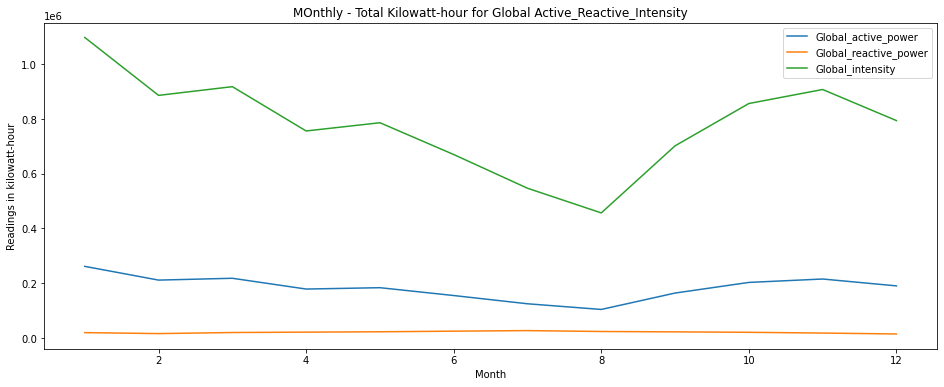

In [125]:
#MOnthly - Total Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Month')['Global_active_power','Global_reactive_power','Global_intensity'].sum().plot(kind="line",xlabel='Month',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="MOnthly - Total Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'MOnthly - Average  Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

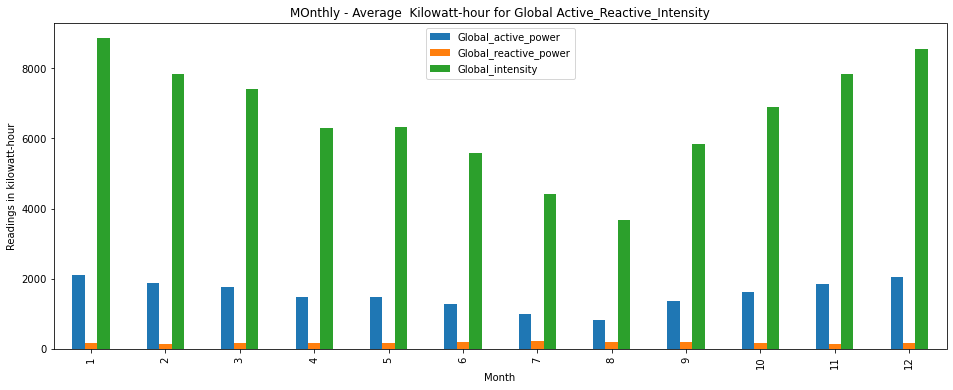

In [128]:
#MOnthly - Average  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Month')['Global_active_power','Global_reactive_power','Global_intensity'].mean().plot(kind="bar",xlabel='Month',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="MOnthly - Average  Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'MOnthly - Maximum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

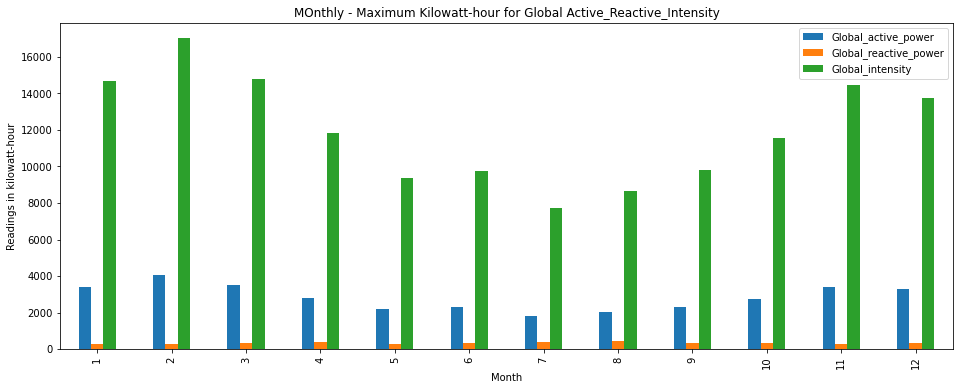

In [129]:
#MOnthly - Maximum  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Month')['Global_active_power','Global_reactive_power','Global_intensity'].max().plot(kind="bar",xlabel='Month',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="MOnthly - Maximum Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'MOnthly - MInimum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Month', ylabel='Readings in kilowatt-hour'>

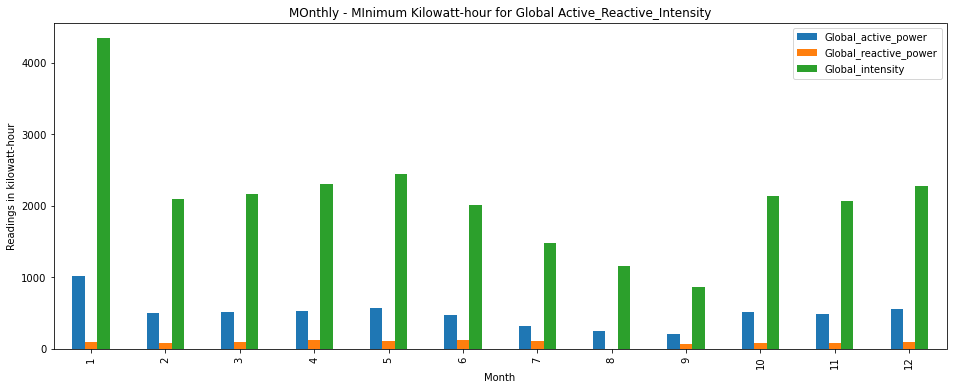

In [131]:
#MOnthly - Minimum Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Month')['Global_active_power','Global_reactive_power','Global_intensity'].min().plot(kind="bar",xlabel='Month',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="MOnthly - MInimum Kilowatt-hour for Global Active_Reactive_Intensity")

Conclusion :

Maximum consumption of real energy is visualised in 12th month (i.e. December)

Minimum consumption of real energy is visualised in 9th month (i.e. September)

On Average, we can say that the real power is consumed less from june till September, post that the consumption increases for remaining g months

<AxesSubplot:title={'center':'Quarterly-Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

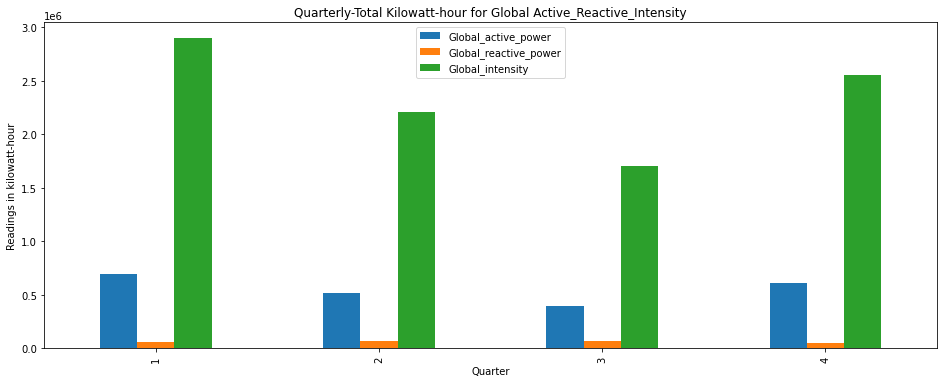

In [132]:
#Quarterly - Total  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Quarter')['Global_active_power','Global_reactive_power','Global_intensity'].sum().plot(kind="bar",xlabel='Quarter',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Quarterly-Total Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Quarterly Average  Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

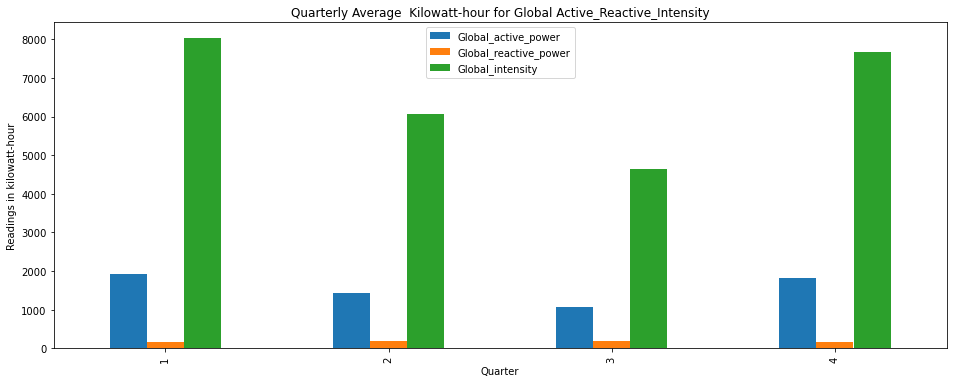

In [133]:
#Quarterly - Average   Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Quarter')['Global_active_power','Global_reactive_power','Global_intensity'].mean().plot(kind="bar",xlabel='Quarter',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Quarterly Average  Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Quarterly Maximum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

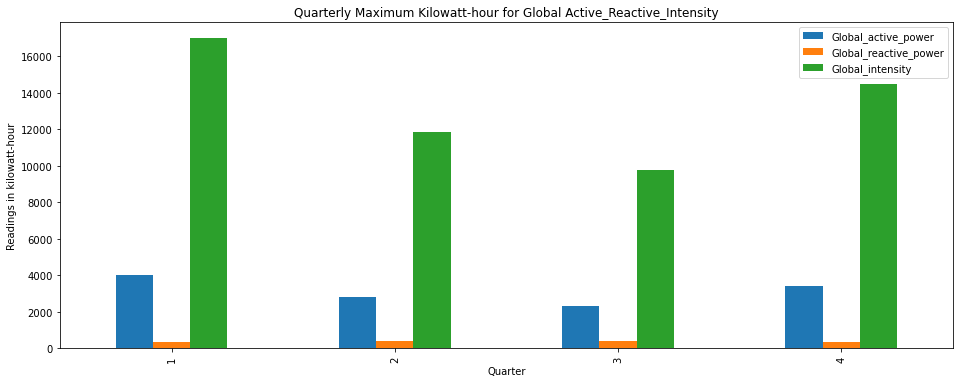

In [134]:
#Quarterly - Maximum  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Quarter')['Global_active_power','Global_reactive_power','Global_intensity'].max().plot(kind="bar",xlabel='Quarter',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Quarterly Maximum Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Quarterly-Minimum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Quarter', ylabel='Readings in kilowatt-hour'>

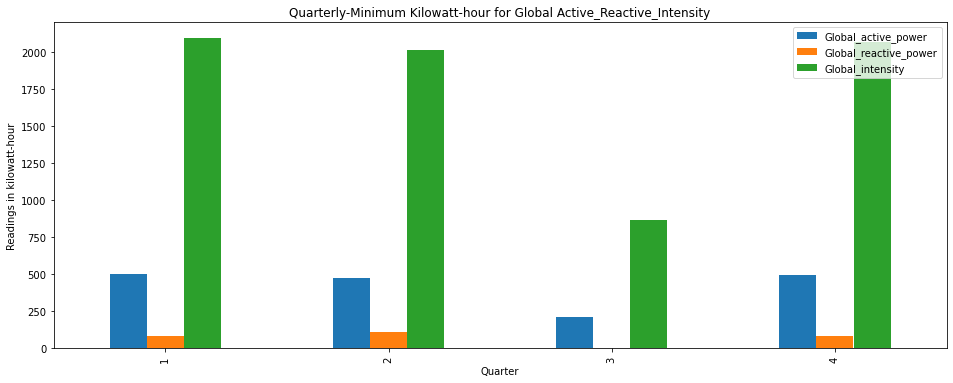

In [135]:
#Quarterly - Minimum   Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Quarter')['Global_active_power','Global_reactive_power','Global_intensity'].min().plot(kind="bar",xlabel='Quarter',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Quarterly-Minimum Kilowatt-hour for Global Active_Reactive_Intensity")

Conclusion :
    
    Consumption of Global Reactive Power, Global Reactive Power and Global Intensity is almost same in First Quarter and Fourth Quarter, whereas Global Reactive Power, Global Reactive Power and Global Intensity consumes less energy in 2nd and 3rd quarter as compared to 1st and 4th quarter.

<AxesSubplot:title={'center':'Weekly-Total Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

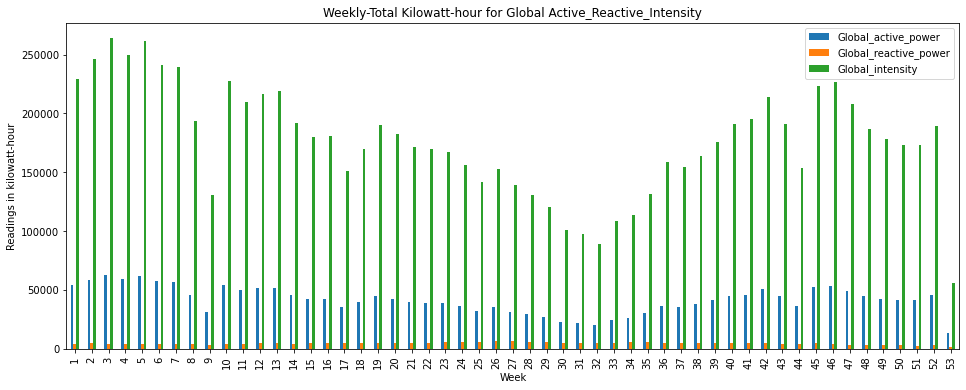

In [136]:
#Weekly- Total  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Week')['Global_active_power','Global_reactive_power','Global_intensity'].sum().plot(kind="bar",xlabel='Week',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Weekly-Total Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Weekly-Average Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

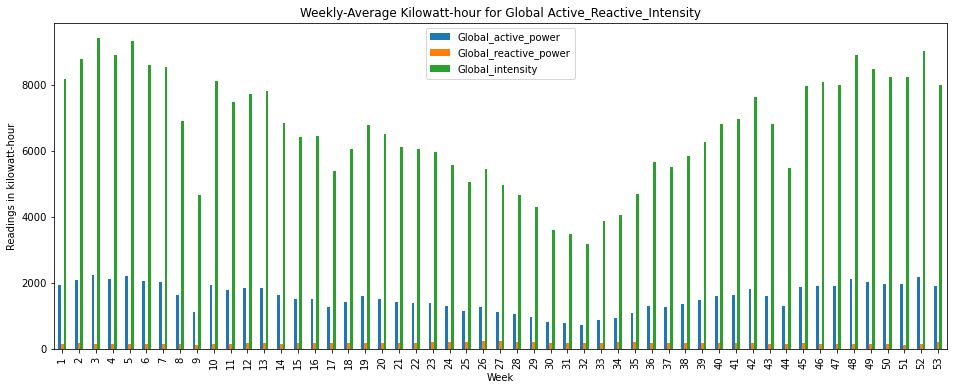

In [137]:
#Weekly- Average  Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Week')['Global_active_power','Global_reactive_power','Global_intensity'].mean().plot(kind="bar",xlabel='Week',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Weekly-Average Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Weekly-Maximum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

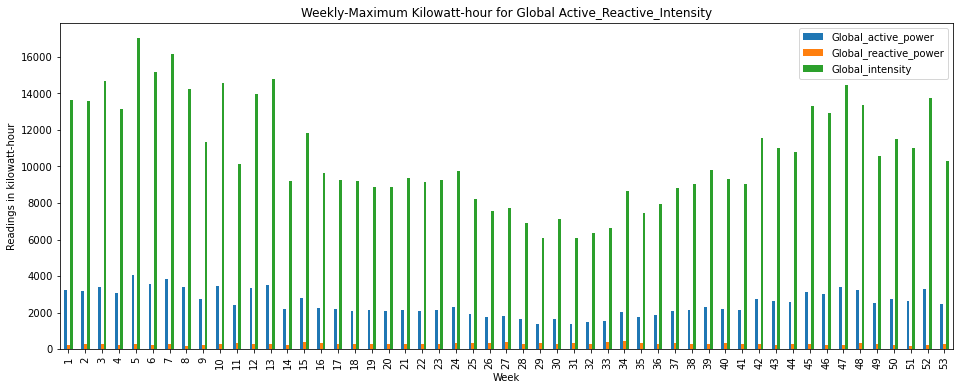

In [138]:
#Weekly- Maximum   Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Week')['Global_active_power','Global_reactive_power','Global_intensity'].max().plot(kind="bar",xlabel='Week',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Weekly-Maximum Kilowatt-hour for Global Active_Reactive_Intensity")

<AxesSubplot:title={'center':'Weekly-Minimum Kilowatt-hour for Global Active_Reactive_Intensity'}, xlabel='Week', ylabel='Readings in kilowatt-hour'>

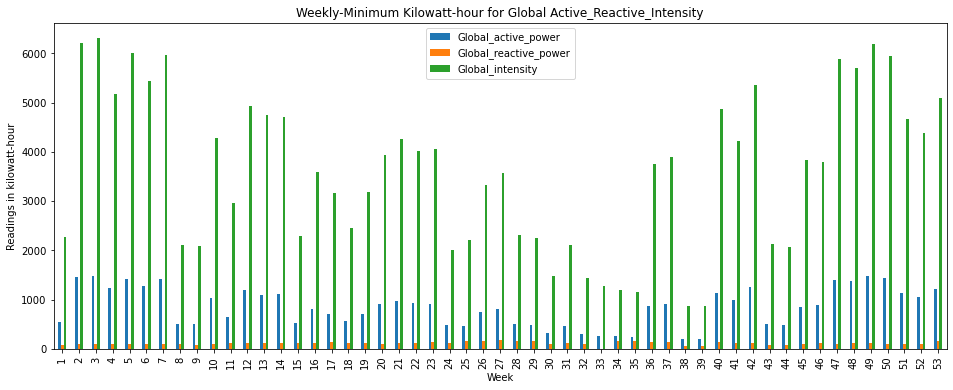

In [139]:
#Weekly- Minimum Kilowatt-hour for Global Active_Reactive_Intensity
df_active_reactive.groupby('Week')['Global_active_power','Global_reactive_power','Global_intensity'].min().plot(kind="bar",xlabel='Week',
                                                                     ylabel='Readings in kilowatt-hour',figsize=(16,6),
                                                                     title="Weekly-Minimum Kilowatt-hour for Global Active_Reactive_Intensity")